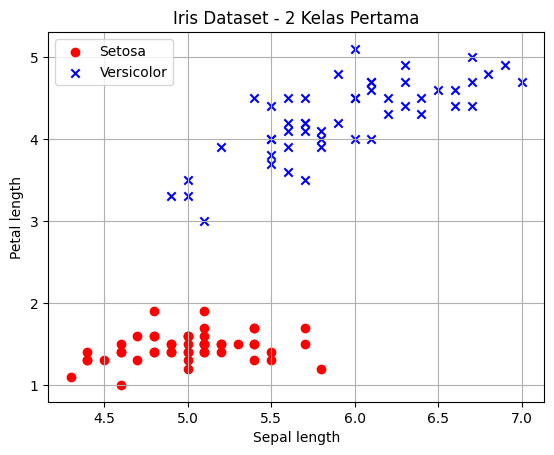

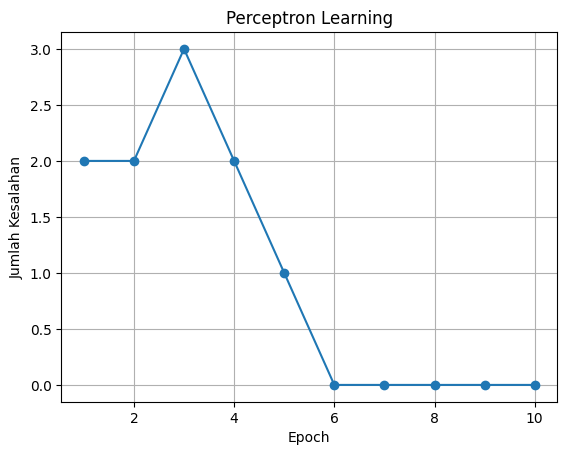

In [1]:
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data Iris
iris = load_iris()
X = iris.data[:100, [0, 2]]  # Ambil fitur sepal length dan petal length dari 2 kelas pertama
y = iris.target[:100]
y = np.where(y == 0, -1, 1)  # Setosa = -1, Versicolor = 1

# Visualisasi data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.title('Iris Dataset - 2 Kelas Pertama')
plt.grid(True)
plt.show()

# Kelas Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=10):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.errors = []

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # Inisialisasi bobot
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Training Perceptron
ppn = Perceptron(learning_rate=0.1, n_iter=10)
ppn.fit(X, y)

# Plot error tiap iterasi
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Jumlah Kesalahan')
plt.title('Perceptron Learning')
plt.grid(True)
plt.show()
